# Exemplo de reamostragem das partículas

In [1]:
from random import randint, choice
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import random
from pf import Particle
from nav_msgs.msg import OccupancyGrid
from occupancy_field import OccupancyField
from helper_functions import angle_normalize, angle_diff

import cv2

import sys
import os
os.getcwd() 
import sys
sys.path.append(os.getcwd())


import inspercles
reload(inspercles)


# Para suprimir alguns warnings do Matplotlib Inline
import warnings
warnings.simplefilter('ignore')
%matplotlib inline


## Diretõrio de trabalho

In [2]:
!pwd




/home/borg/catkin_ws/src/robot17/particle_filter/jupyter_particle


In [3]:
# Dados do arquivo mapa.yaml

resolution = 0.020000
origin =  [-5.000000, -5.000000, 0.000000]
occupied_thresh = 0.8
free_thresh =  0.2

inspercles.free_thresh = free_thresh # Limiar em tons de cinza para que uma celula seja considerada livre
inspercles.occupied_thresh = occupied_thresh # Limiar de celula ocupada
inspercles.origin = origin
inspercles.resolution = resolution


In [4]:


from PIL import Image as PilImage


color_image = cv2.imread("sparse_obstacles.png")
pil_image = color_image
np_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)


#color_image = PilImage.open("sparse_obstacles.png", 'r')
#pil_image = color_image.convert('1') # Converte a imagem PIL para Grayscale
#np_image = np.asarray(pil_image)

particle_size = 10

#import matplotlib_render as plotmap


back_color = "black"
colors     = ['red', 'green', 'cyan', 'yellow']
width, height = 775, 746

inspercles.width = width
inspercles.height = height




initial_pose = [200, 200, math.pi/8] # Posicao inicial considerada para o pf
inspercles.initial_pose = initial_pose
pose = [330, 220, math.radians(90)] # posicao "verdadeira" do robo 
inspercles.pose = pose
robot_radius=10   # Raio do robo
inspercles.robot_radius = robot_radius


# Os angulos em que o robo simulado vai ter sensores
angles = np.linspace(0.0, 2*math.pi, num=8)

particle_cloud = []



    
    
    
    

## Mapa com posição inicial

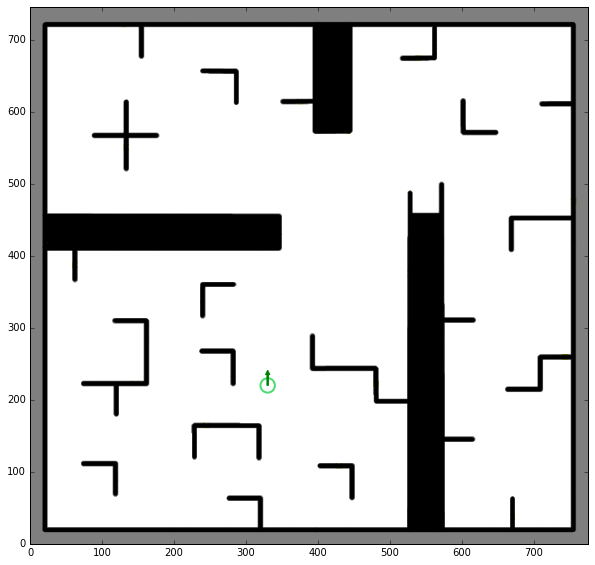

In [5]:
inspercles.nb_draw_map(color_image, pose=pose, robot=True)

A função *nb_initialize_particle_cloud()* pertence ao módulo <code>inspercles</code> e já faz uma primeira aleatorização das partículas

In [6]:
particulas = inspercles.nb_create_particles(pose = initial_pose, var_x = 100, var_y = 100, var_theta = math.pi/2, num = 10)


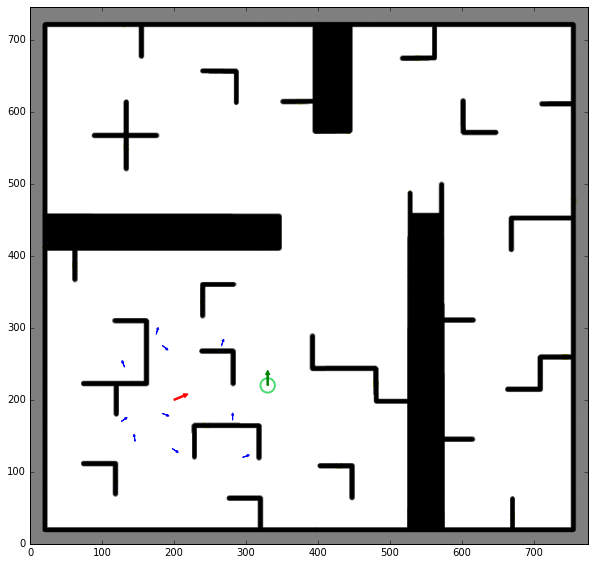

In [7]:
inspercles.nb_draw_map(color_image, particles = particulas, initial_position = initial_pose, pose=pose, robot=True)

Vamos tornar a distribuição das partículas desequilibrada para observarmos a reamostragem

In [8]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [9]:
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]
particulas_pesos = [p.w for p in particulas]

In [10]:
particulas_exp

[[145.91705910645587, 142.3263558409655, 1.7403215862780734],
 [131.2397978591226, 245.3667132535397, 1.9416012129341063],
 [183.60639690596867, 181.1559874015588, -0.38135254921082795],
 [197.51416199580478, 132.19926476353504, -0.5669251918137582],
 [265.71480390342316, 274.7180503203442, 1.251816955666365],
 [183.73883825643446, 275.38727199709115, -0.6820435816991071],
 [295.2911959102321, 119.95794913975601, 0.3655187009250487],
 [175.1845928295023, 290.8573754118832, 1.3006662694334694],
 [281.3487906973178, 171.72951097447356, 1.5691755392062672],
 [126.685210816254, 169.86532786786202, 0.6110399177690842]]

Vejam como está a distribuição dos pesos

In [11]:
particulas_pesos

[0.8,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223]

Vamos criar novas partículas reamostrando

In [12]:
novas_particulas = Particle.draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso perdeu o sentido. Precisamos fazer com que todos os pesos virem w=1

In [16]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

Vamos ver as partículas

Vamos observar os valores das partículas

In [14]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula com $80\%$ de probabilidade é muito mais prevalente


<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>

In [15]:
valores_novas_particulas

[[145.91705910645587, 142.3263558409655, 1.7403215862780734],
 [145.91705910645587, 142.3263558409655, 1.7403215862780734],
 [145.91705910645587, 142.3263558409655, 1.7403215862780734],
 [145.91705910645587, 142.3263558409655, 1.7403215862780734],
 [145.91705910645587, 142.3263558409655, 1.7403215862780734],
 [175.1845928295023, 290.8573754118832, 1.3006662694334694],
 [145.91705910645587, 142.3263558409655, 1.7403215862780734],
 [145.91705910645587, 142.3263558409655, 1.7403215862780734],
 [281.3487906973178, 171.72951097447356, 1.5691755392062672],
 [145.91705910645587, 142.3263558409655, 1.7403215862780734]]

![](anim.gif)